# Heart Disease Prediction - Exploratory Data Analysis

**Comprehensive analysis of heart disease dataset with visualizations**

---

## Table of Contents
1. [Import Libraries](#1-import-libraries)
2. [Load Data](#2-load-data)
3. [Data Overview](#3-data-overview)
4. [Data Quality Assessment](#4-data-quality-assessment)
5. [Statistical Summary](#5-statistical-summary)
6. [Target Variable Analysis](#6-target-variable-analysis)
7. [Numerical Features](#7-numerical-features)
8. [Categorical Features](#8-categorical-features)
9. [Correlation Analysis](#9-correlation-analysis)
10. [Bivariate Analysis](#10-bivariate-analysis)
11. [Age & Gender Analysis](#11-age--gender-analysis)
12. [Key Findings](#12-key-findings)

## 1. Import Libraries

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Create output directory
import os
if not os.path.exists('eda_outputs'):
    os.makedirs('eda_outputs')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load Data

In [2]:
# Load dataset
df = pd.read_csv('heart_disease.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 10000 rows × 21 columns


## 3. Data Overview

In [3]:
# Display first few rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [4]:
# Data types and info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15 

In [5]:
# Identify column types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}):")
print(numerical_cols)
print(f"\nCategorical Columns ({len(categorical_cols)}):")
print(categorical_cols)


Numerical Columns (9):
['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

Categorical Columns (12):
['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']


## 4. Data Quality Assessment

In [6]:
# Missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Analysis:")
missing_data

Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage
12,Alcohol Consumption,2586,25.86
3,Cholesterol Level,30,0.30
15,Sugar Consumption,30,0.30
7,Diabetes,30,0.30
0,Age,29,0.29
11,High LDL Cholesterol,26,0.26
18,CRP Level,26,0.26
16,Triglyceride Level,26,0.26
9,High Blood Pressure,26,0.26
14,Sleep Hours,25,0.25


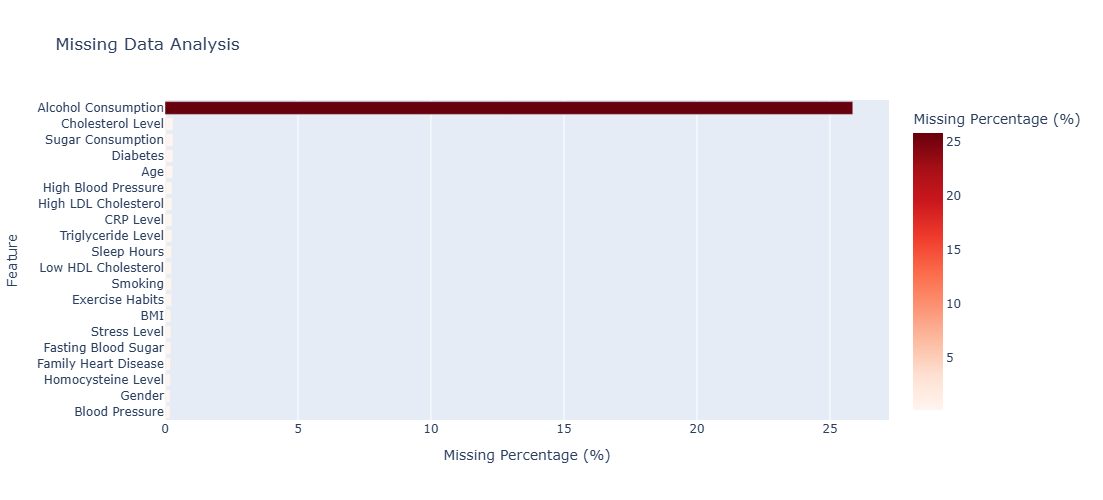

In [7]:
# Visualize missing data
fig = px.bar(missing_data.sort_values('Missing_Percentage'), 
             x='Missing_Percentage', 
             y='Column',
             orientation='h',
             title='Missing Data Analysis',
             labels={'Missing_Percentage': 'Missing Percentage (%)', 'Column': 'Feature'},
             color='Missing_Percentage',
             color_continuous_scale='Reds')
fig.update_layout(height=500, showlegend=False)
fig.show()

In [8]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

Duplicate Rows: 0 (0.00%)


## 5. Statistical Summary

In [9]:
# Numerical features statistics
print("Numerical Features Summary:")
df.describe().T.style.background_gradient(cmap='coolwarm')

Numerical Features Summary:


,count,mean,std,min,25%,50%,75%,max
Age,9971.000000,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.000000,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.000000,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.000000,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.000000,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.000000,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.000000,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.000000,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.000000,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [10]:
# Categorical features
print("Categorical Features Summary:\n")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
    print("-" * 50)

Categorical Features Summary:


Gender:
Gender
Male      5003
Female    4978
Name: count, dtype: int64
Unique values: 2
--------------------------------------------------

Exercise Habits:
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64
Unique values: 3
--------------------------------------------------

Smoking:
Smoking
Yes    5123
No     4852
Name: count, dtype: int64
Unique values: 2
--------------------------------------------------

Family Heart Disease:
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64
Unique values: 2
--------------------------------------------------

Diabetes:
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64
Unique values: 2
--------------------------------------------------

High Blood Pressure:
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64
Unique values: 2
--------------------------------------------------

Low HDL Cholesterol:
Low HDL Cholesterol
Yes    5000
No    

## 6. Target Variable Analysis

In [11]:
target = 'Heart Disease Status'

# Count and percentage
print(f"Target Variable: {target}\n")
target_counts = df[target].value_counts()
target_pct = df[target].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_pct
})
print(target_summary)

Target Variable: Heart Disease Status

                      Count  Percentage
Heart Disease Status                   
No                     8000        80.0
Yes                    2000        20.0


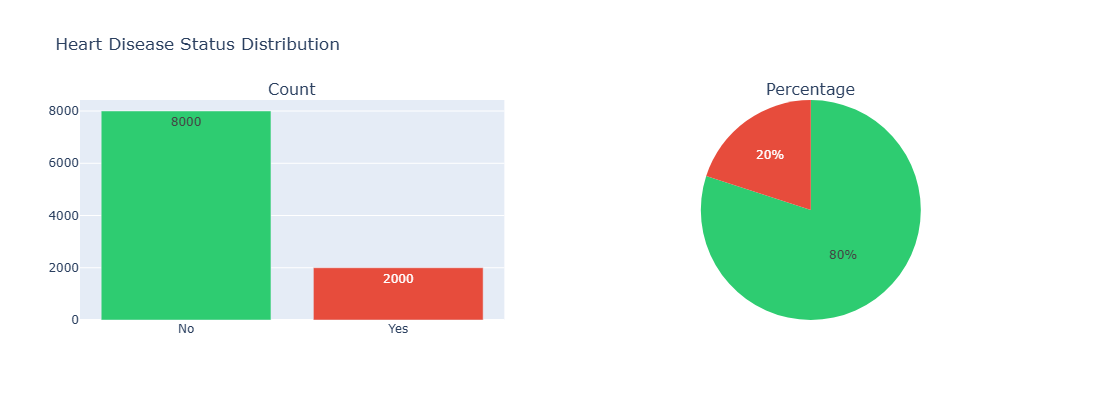

In [12]:
# Interactive target distribution
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'bar'}, {'type':'pie'}]],
                    subplot_titles=('Count', 'Percentage'))

# Bar chart
fig.add_trace(
    go.Bar(x=target_counts.index, y=target_counts.values,
           marker_color=['#2ecc71', '#e74c3c'],
           text=target_counts.values,
           textposition='auto'),
    row=1, col=1
)

# Pie chart
fig.add_trace(
    go.Pie(labels=target_counts.index, values=target_counts.values,
           marker_colors=['#2ecc71', '#e74c3c']),
    row=1, col=2
)

fig.update_layout(title_text="Heart Disease Status Distribution", 
                  showlegend=False, height=400)
fig.show()

## 7. Numerical Features

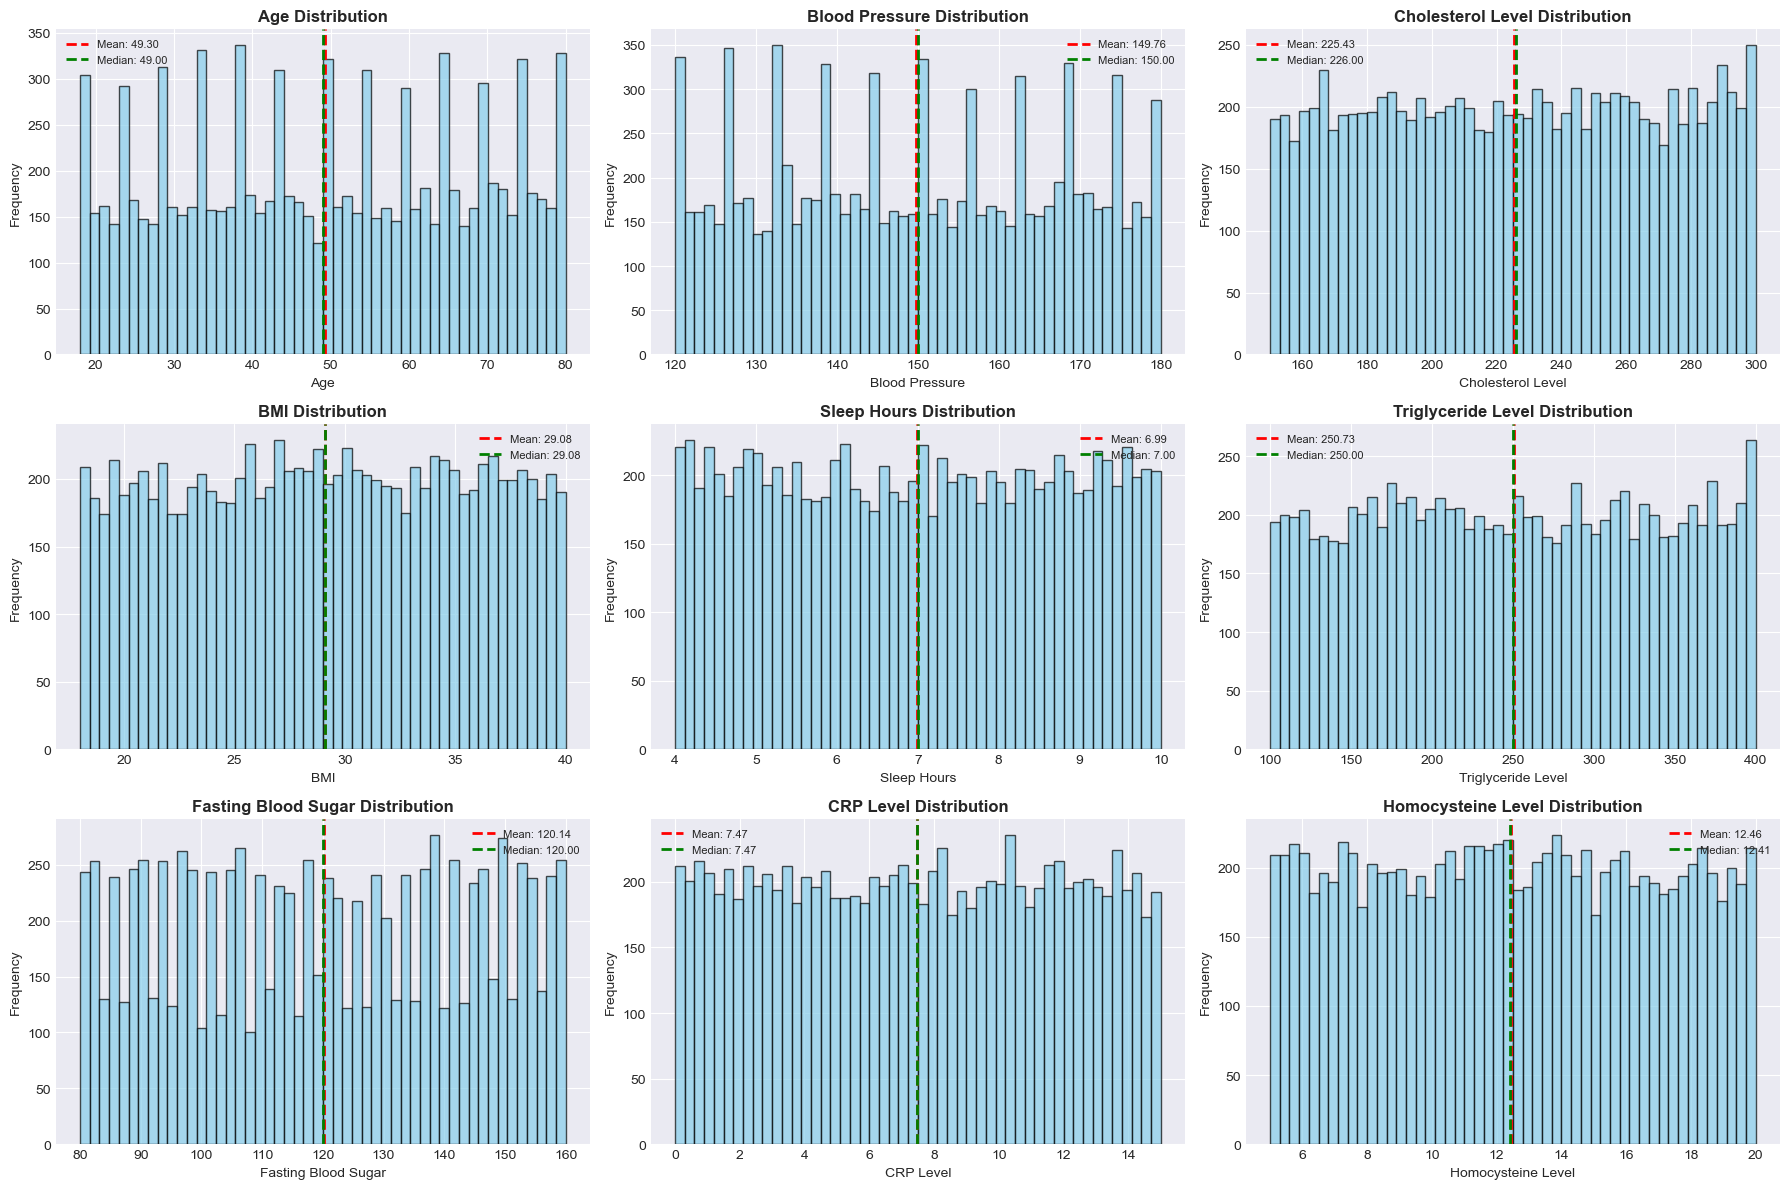

In [13]:
# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.savefig('eda_outputs/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

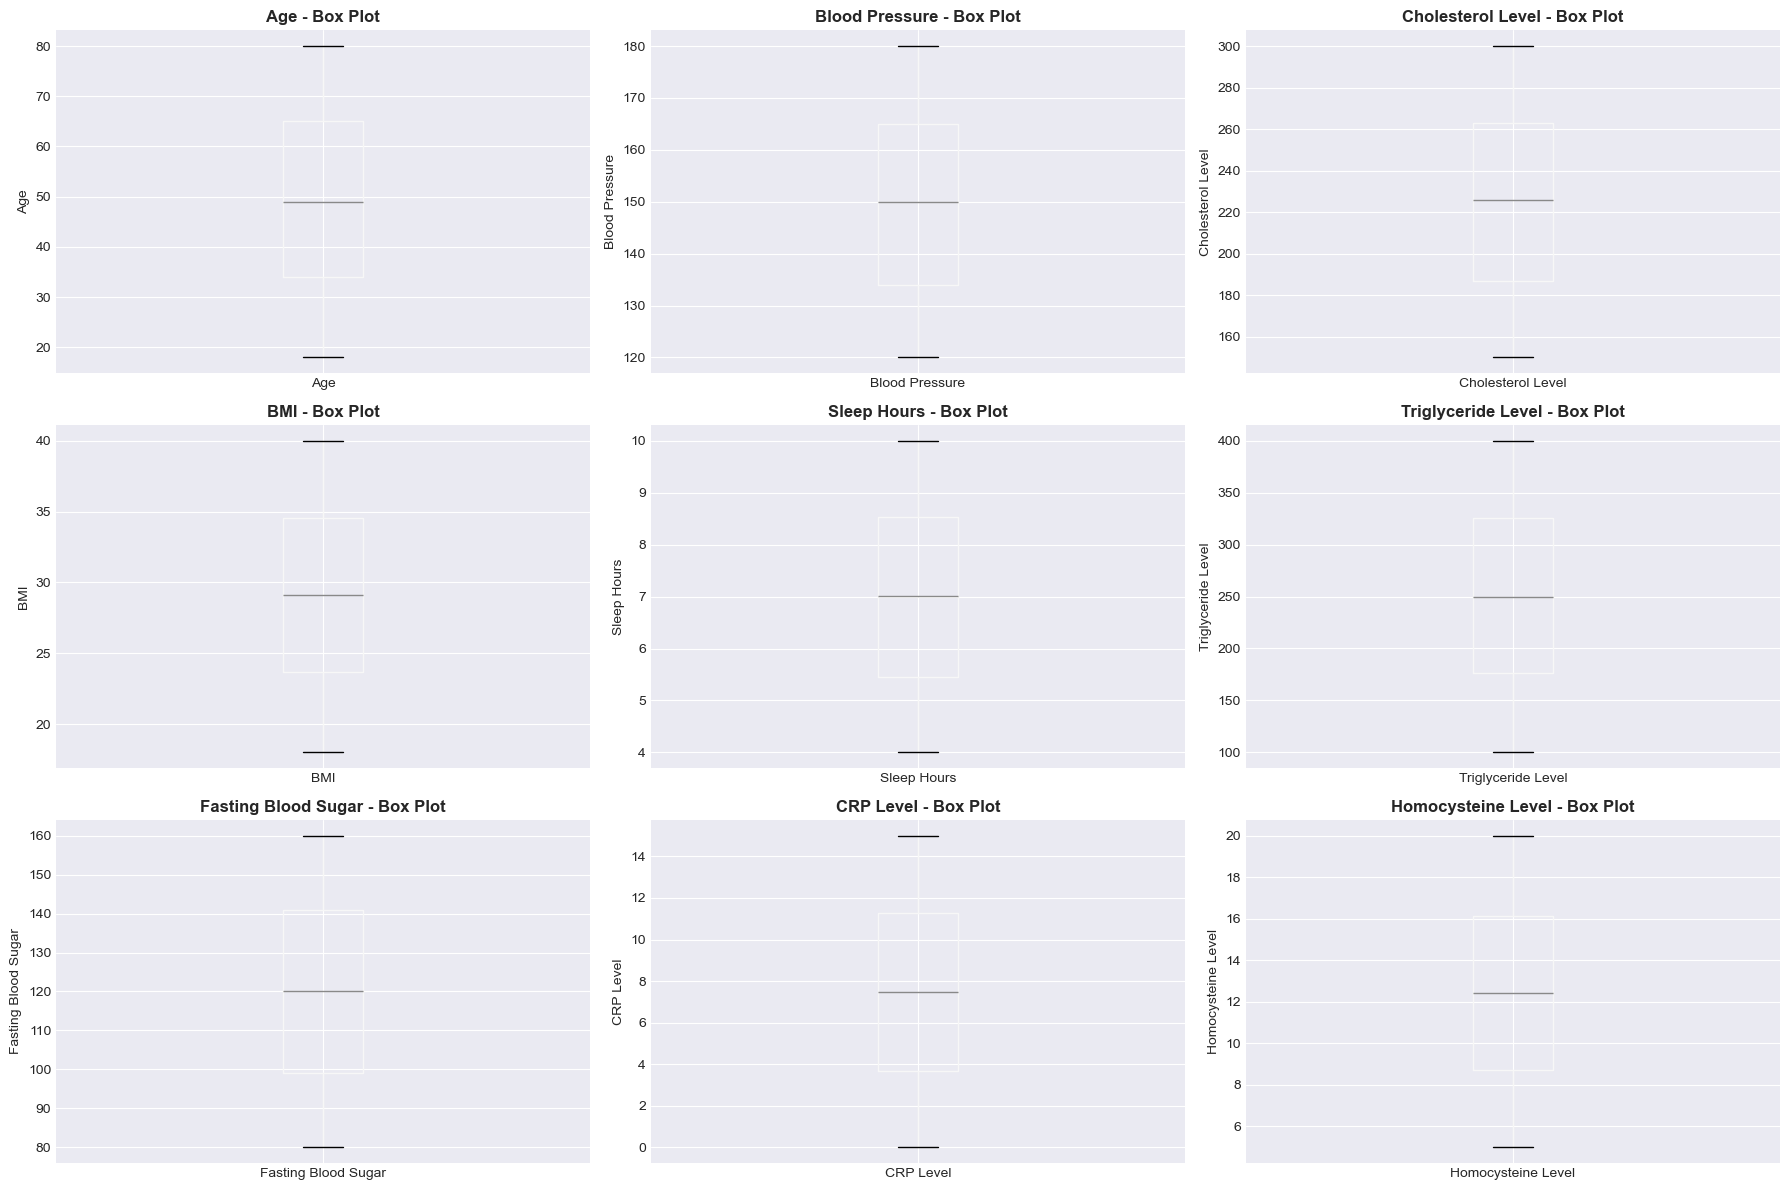

In [14]:
# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'{col} - Box Plot', fontweight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.savefig('eda_outputs/boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Categorical Features

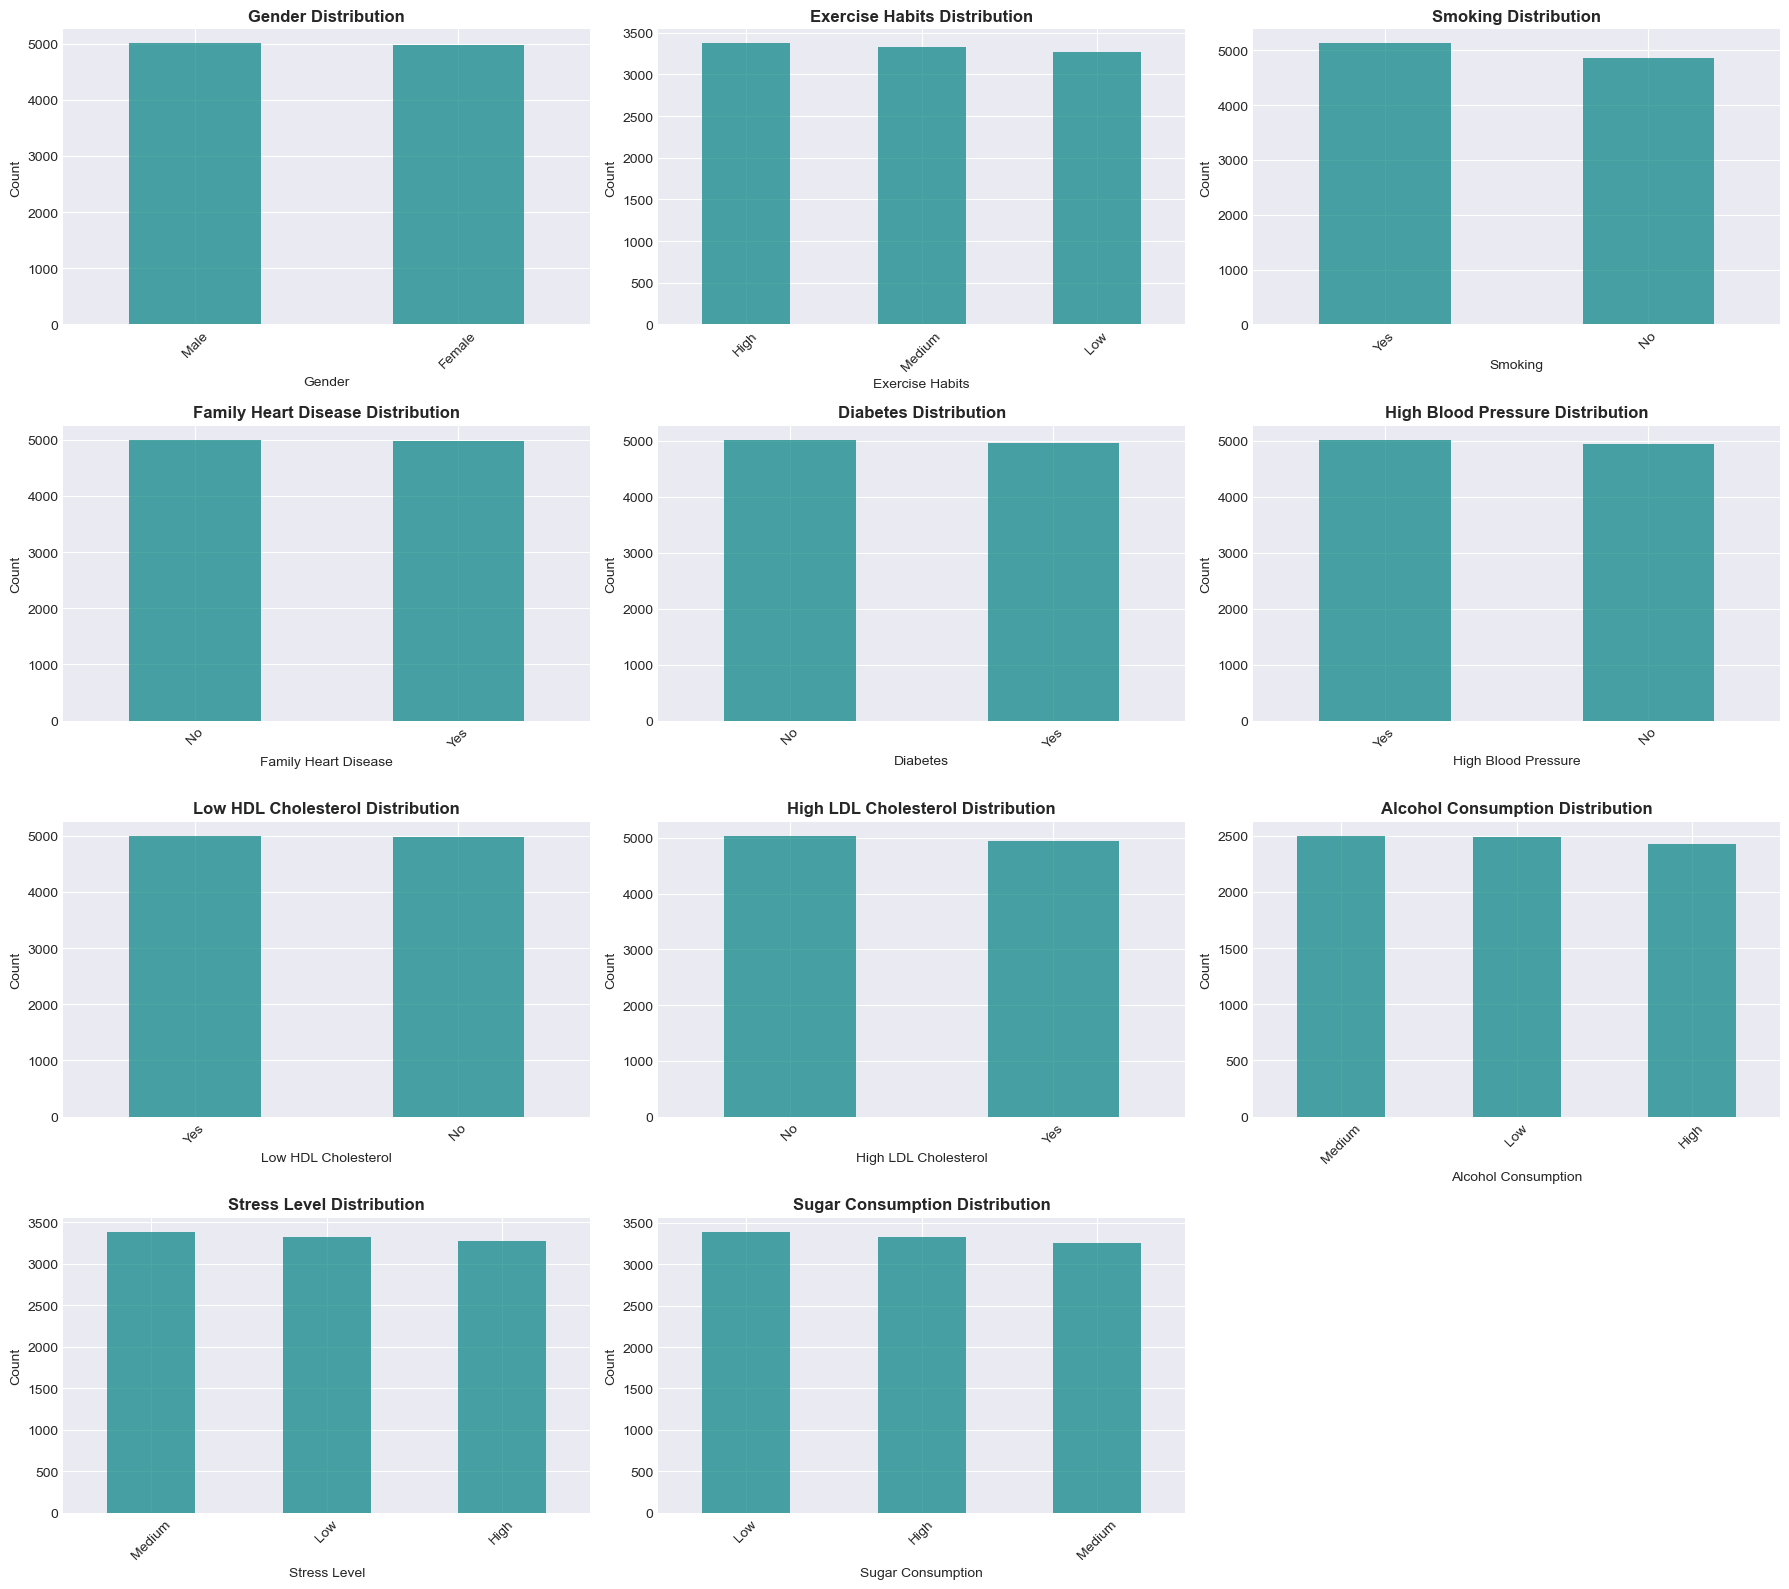

In [15]:
# Categorical feature distributions (excluding target)
categorical_features = [col for col in categorical_cols if col != target]

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide extra subplots
for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('eda_outputs/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Correlation Analysis

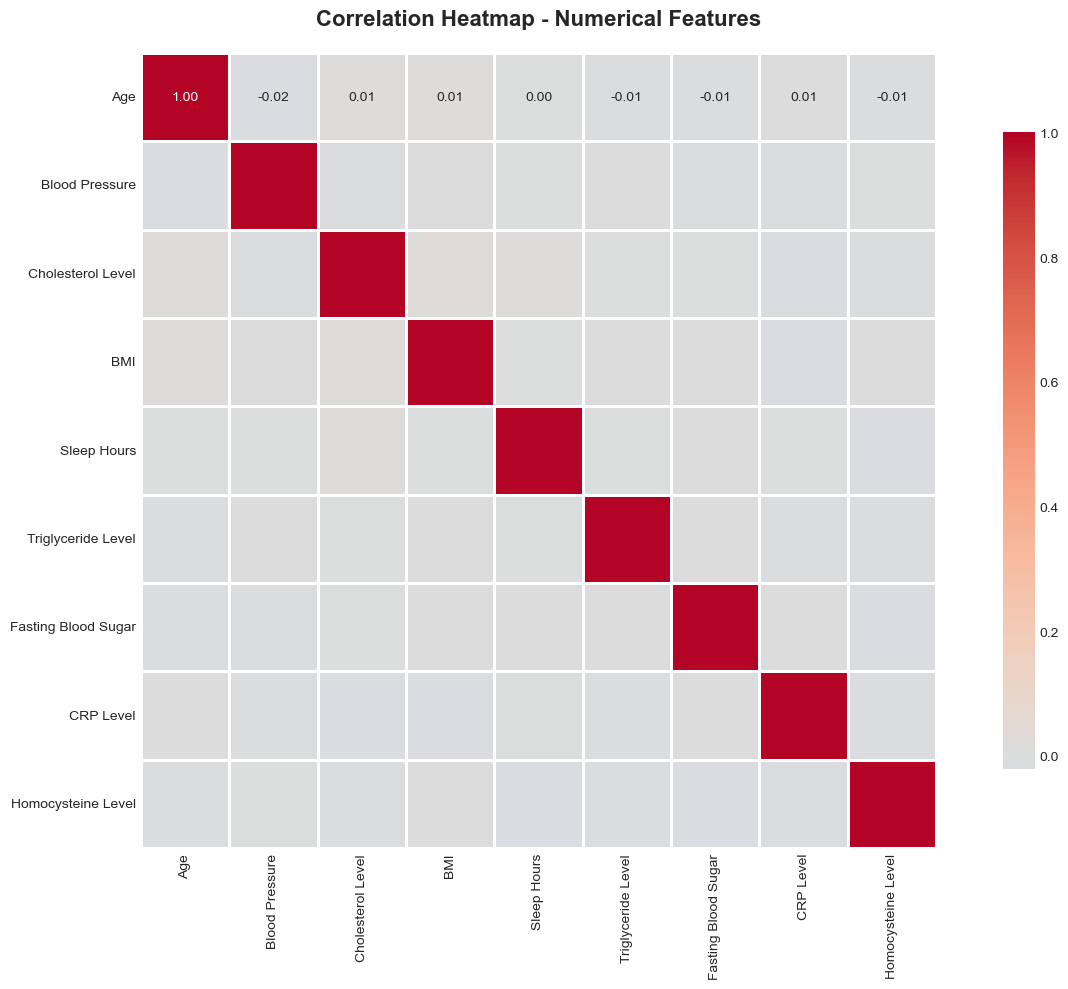

In [16]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Static heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('eda_outputs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

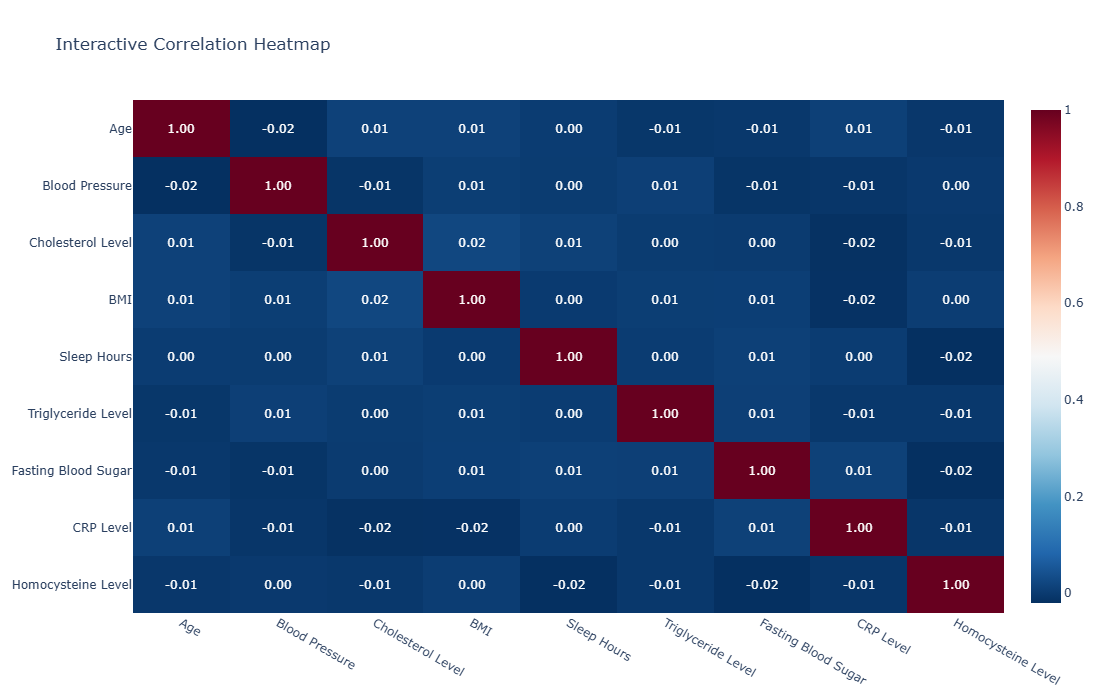

In [17]:
# Interactive correlation heatmap
fig = px.imshow(correlation_matrix, 
                text_auto='.2f',
                color_continuous_scale='RdBu_r',
                title='Interactive Correlation Heatmap',
                aspect='auto')
fig.update_layout(height=700)
fig.show()

In [18]:
# Find highly correlated features
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)
    print("Highly Correlated Features (|r| > 0.5):")
    display(high_corr_df)
else:
    print("No highly correlated features found (|r| > 0.5)")

No highly correlated features found (|r| > 0.5)


## 10. Bivariate Analysis

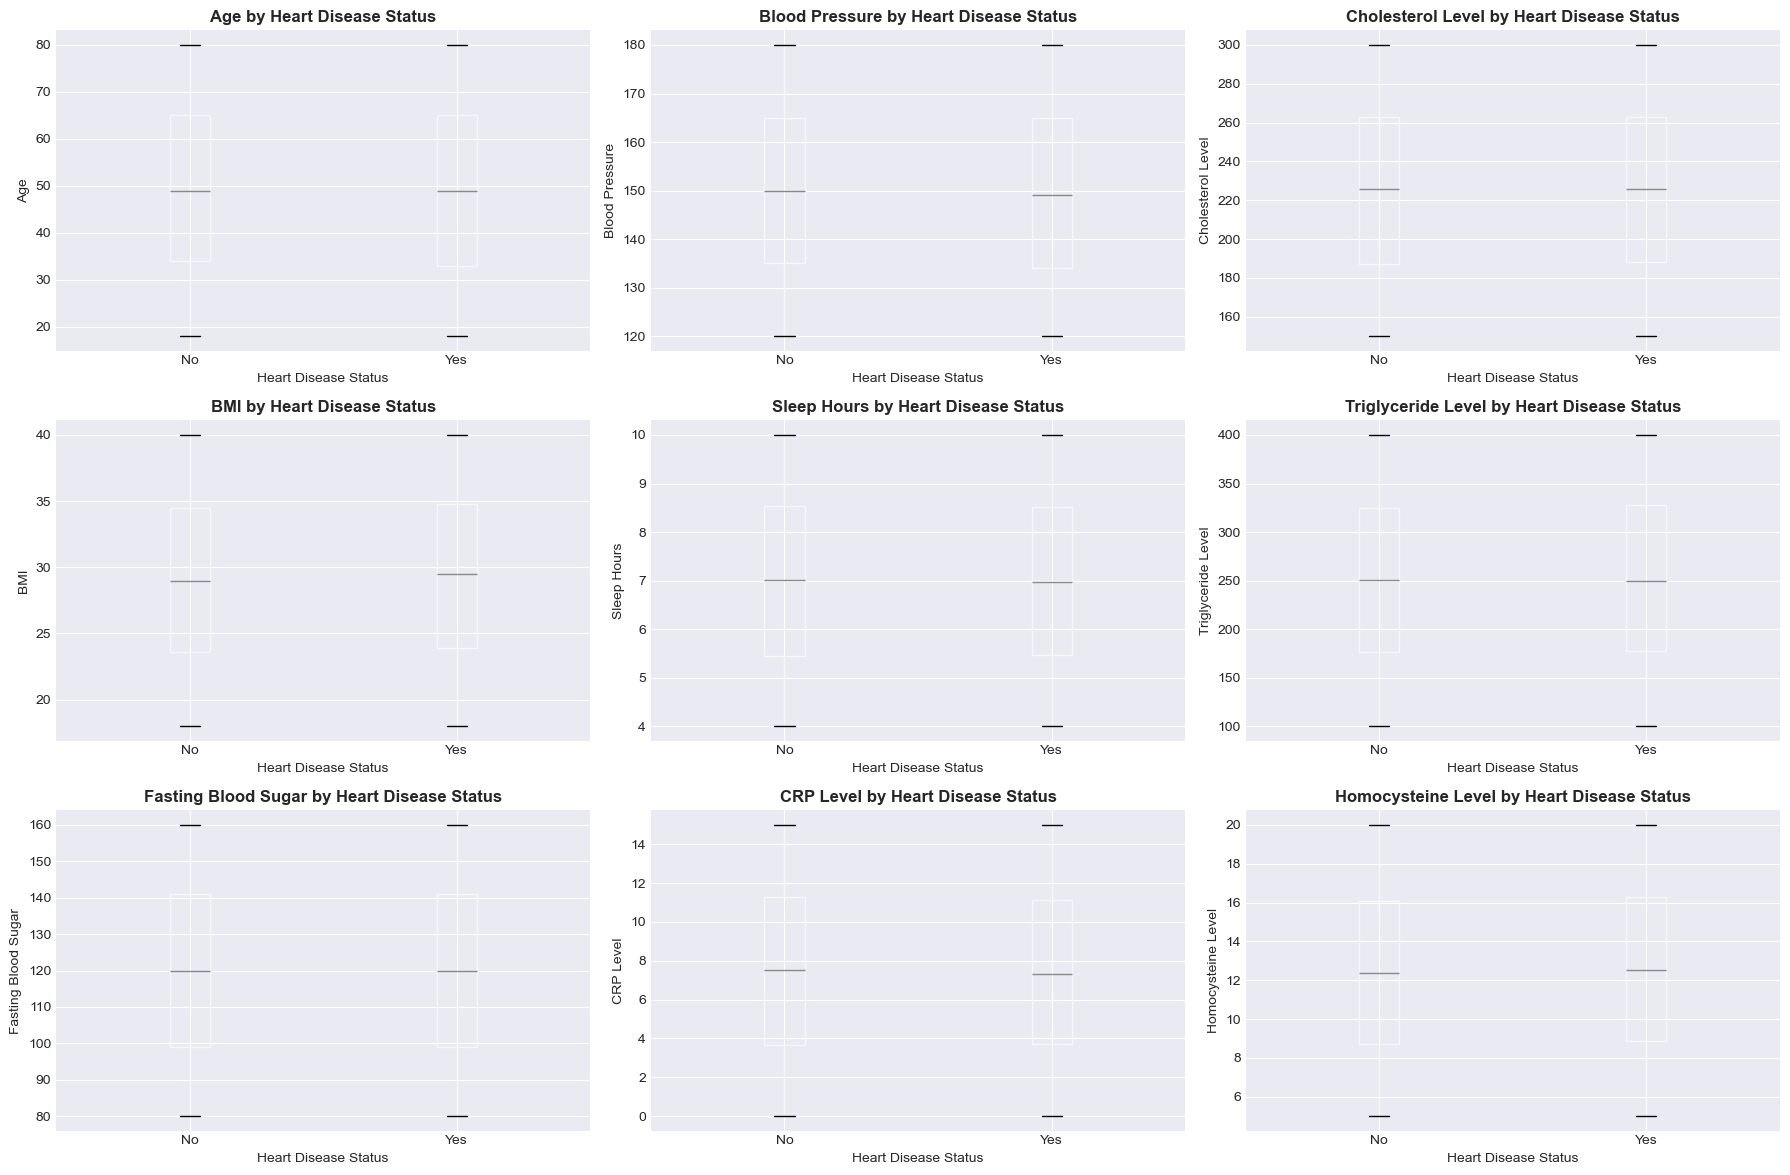

In [19]:
# Numerical features vs Target
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by=target, ax=axes[idx])
    axes[idx].set_title(f'{col} by {target}', fontweight='bold')
    axes[idx].set_xlabel(target)
    axes[idx].set_ylabel(col)
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('eda_outputs/numerical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

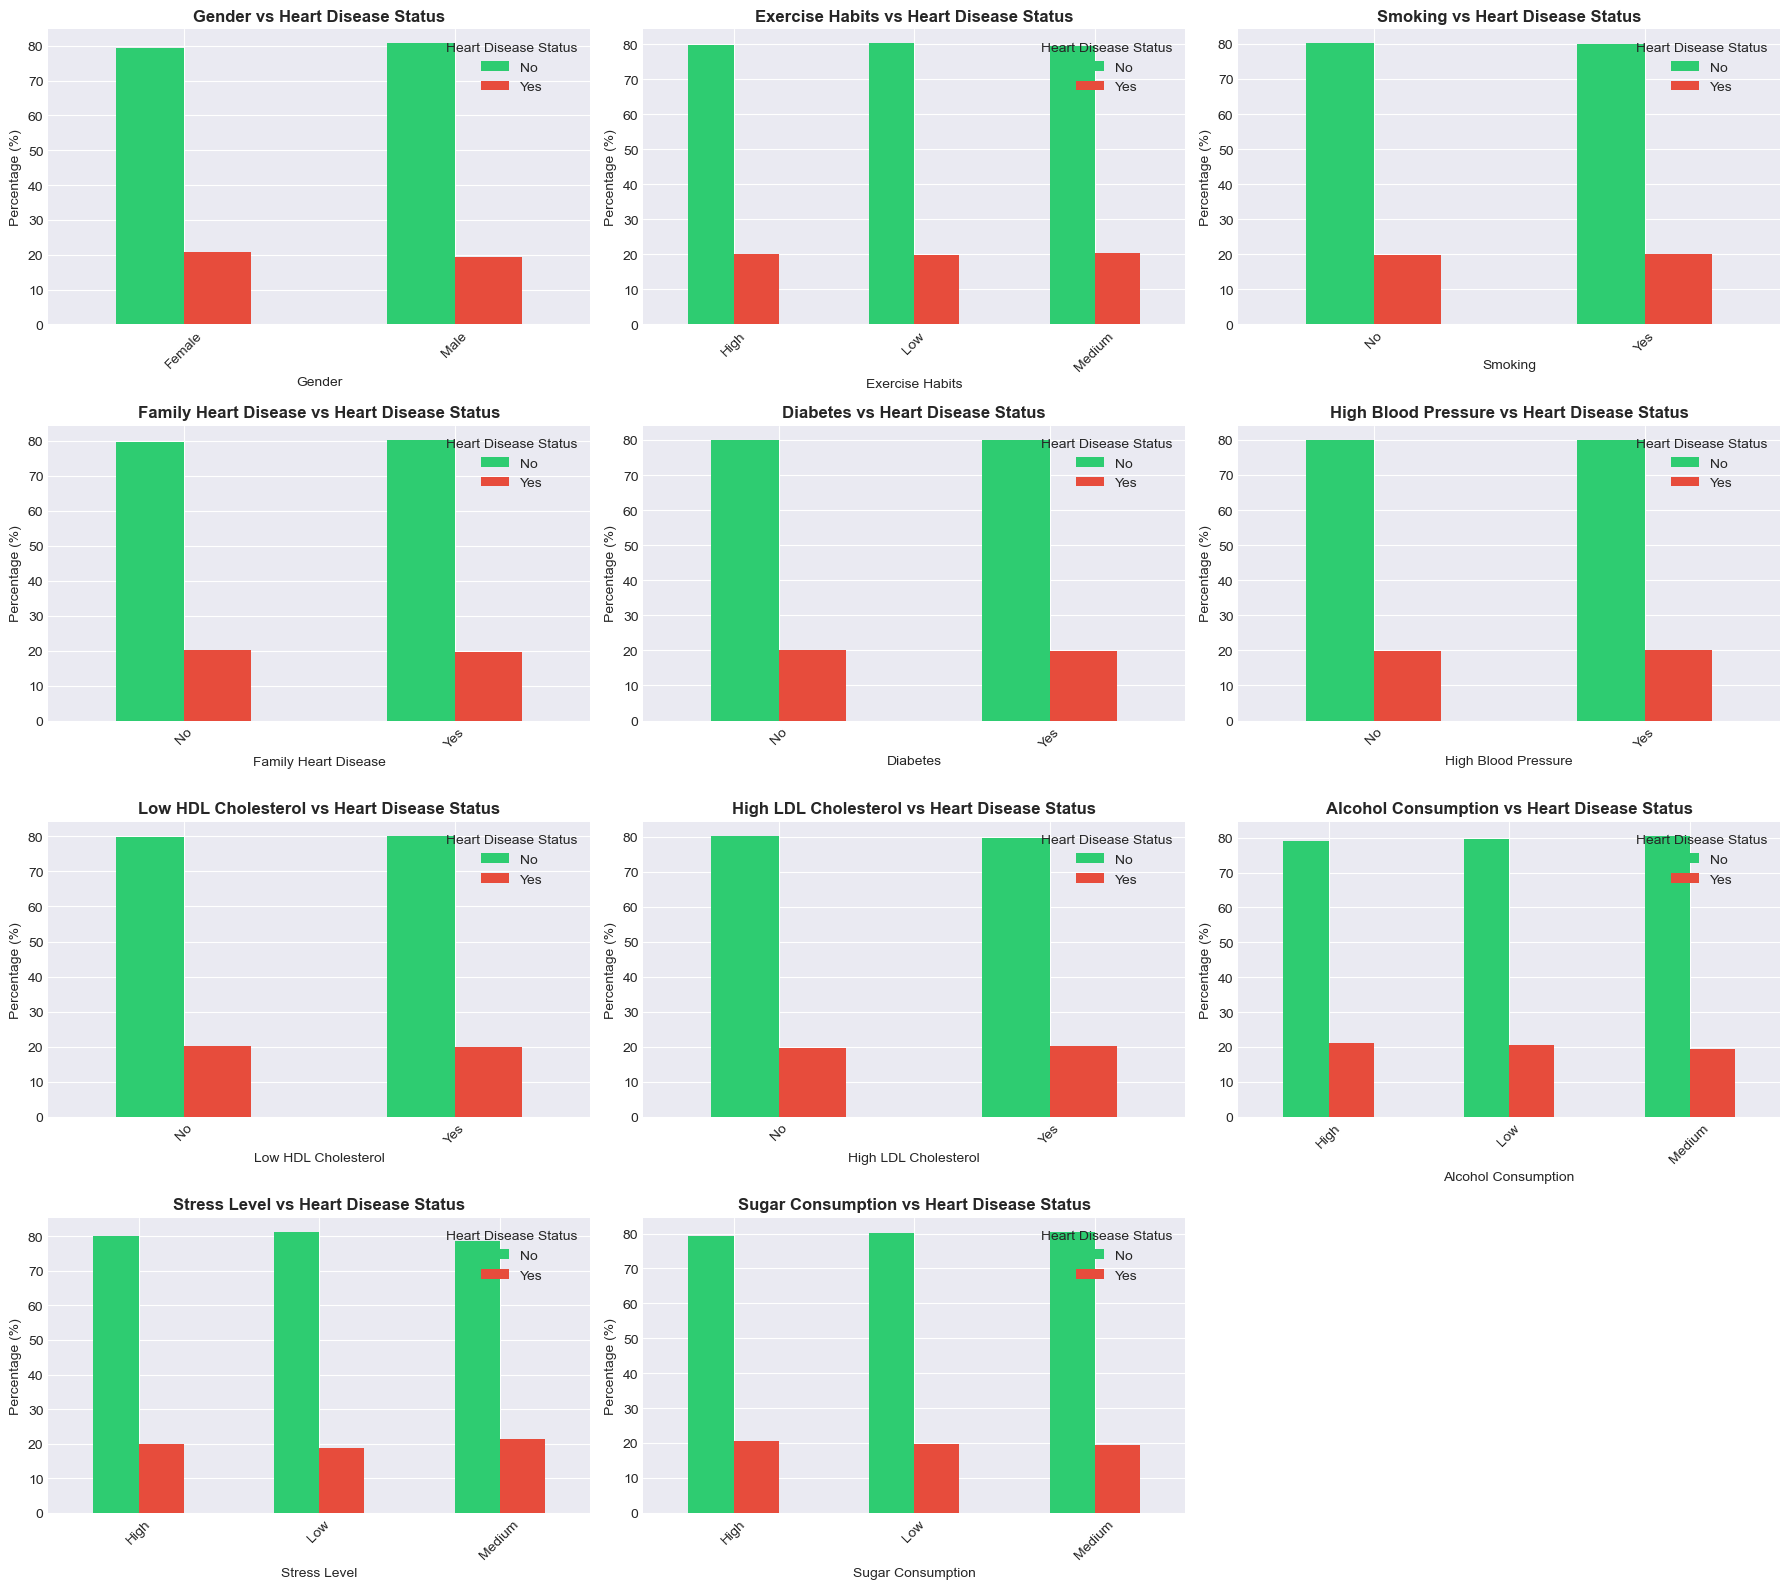

In [20]:
# Categorical features vs Target
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    ct = pd.crosstab(df[col], df[target], normalize='index') * 100
    ct.plot(kind='bar', stacked=False, ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs {target}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title=target, loc='best')
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('eda_outputs/categorical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Chi-square test for categorical variables
chi_results = []
for col in categorical_features:
    ct = pd.crosstab(df[col].fillna('Missing'), df[target])
    chi2, p_value, dof, expected = chi2_contingency(ct)
    chi_results.append({
        'Feature': col,
        'Chi2': chi2,
        'P-Value': p_value,
        'Significant': 'Yes ✓' if p_value < 0.05 else 'No'
    })

chi_df = pd.DataFrame(chi_results).sort_values('P-Value')
print("Chi-Square Tests (Categorical Features vs Target):")
chi_df.style.background_gradient(subset=['P-Value'], cmap='RdYlGn_r')

Chi-Square Tests (Categorical Features vs Target):


,Feature,Chi2,P-Value,Significant
9,Stress Level,8.287771,0.040424,Yes ✓
0,Gender,5.312136,0.070224,No
1,Exercise Habits,4.460186,0.215869,No
3,Family Heart Disease,2.801898,0.246363,No
10,Sugar Consumption,3.208398,0.360597,No
8,Alcohol Consumption,3.207175,0.360773,No
6,Low HDL Cholesterol,1.305905,0.520507,No
7,High LDL Cholesterol,0.973311,0.614679,No
2,Smoking,0.311181,0.855910,No
4,Diabetes,0.073123,0.964099,No


## 11. Age & Gender Analysis

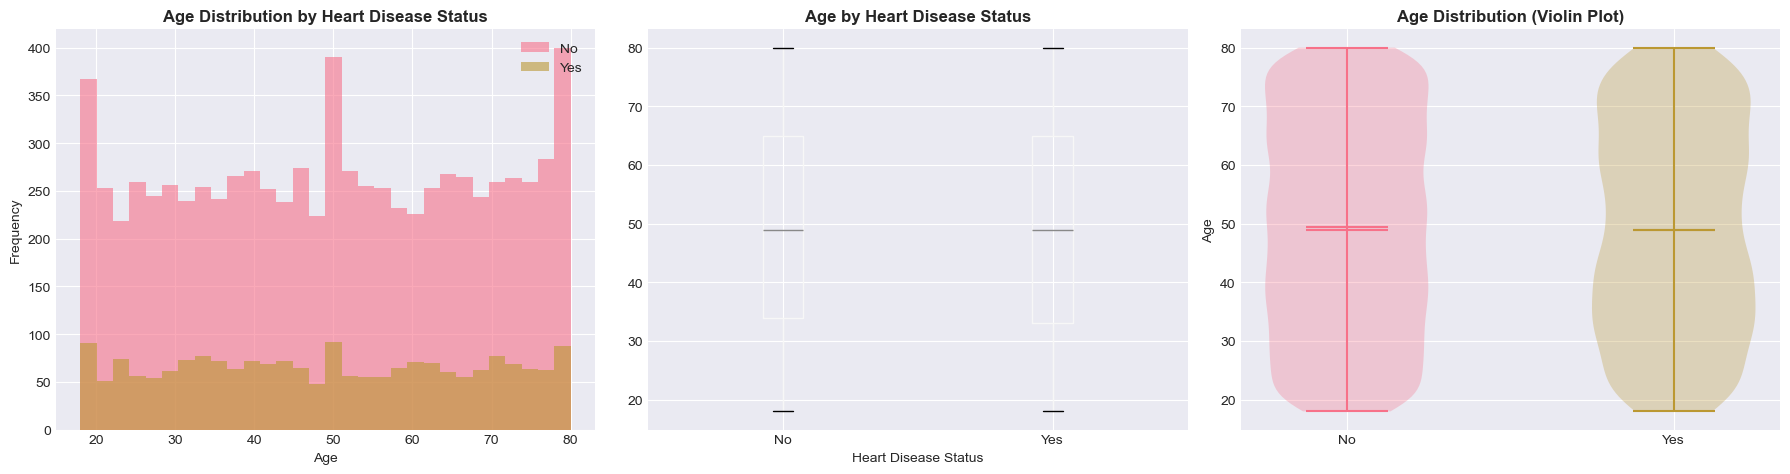

In [22]:
# Age analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution by disease status
for status in df[target].unique():
    data = df[df[target] == status]['Age'].dropna()
    axes[0].hist(data, alpha=0.6, bins=30, label=status)
axes[0].set_title('Age Distribution by Heart Disease Status', fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
df.boxplot(column='Age', by=target, ax=axes[1])
axes[1].set_title('Age by Heart Disease Status', fontweight='bold')
axes[1].get_figure().suptitle('')

# Violin plot
for i, status in enumerate(df[target].unique()):
    data = df[df[target] == status]['Age'].dropna()
    parts = axes[2].violinplot([data], positions=[i], showmeans=True, showmedians=True)
axes[2].set_xticks(range(len(df[target].unique())))
axes[2].set_xticklabels(df[target].unique())
axes[2].set_title('Age Distribution (Violin Plot)', fontweight='bold')
axes[2].set_ylabel('Age')

plt.tight_layout()
plt.savefig('eda_outputs/age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Heart Disease by Age Group (%):


Heart Disease Status,No,Yes
Age_Group,,
<30,80.503778,19.496222
30-40,78.071253,21.928747
40-50,80.038388,19.961612
50-60,80.649351,19.350649
60+,80.276498,19.723502


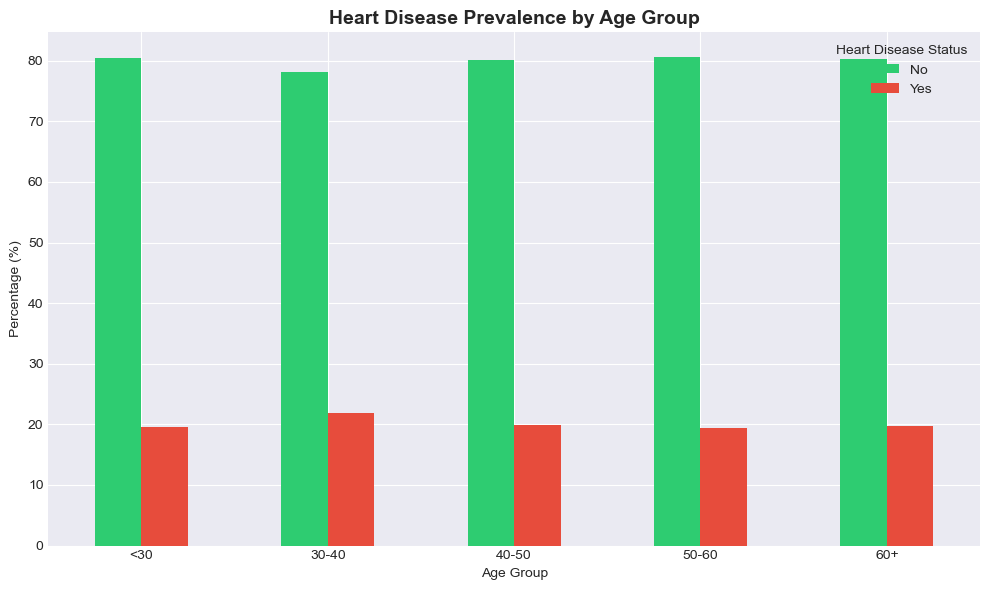

In [23]:
# Age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], 
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

age_disease = pd.crosstab(df['Age_Group'], df[target], normalize='index') * 100
print("Heart Disease by Age Group (%):")
display(age_disease)

# Visualization
age_disease.plot(kind='bar', figsize=(10, 6), color=['#2ecc71', '#e74c3c'])
plt.title('Heart Disease Prevalence by Age Group', fontweight='bold', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title=target)
plt.tight_layout()
plt.show()

Heart Disease by Gender (%):


Heart Disease Status,No,Yes
Gender,,
Female,79.308959,20.691041
Male,80.631621,19.368379


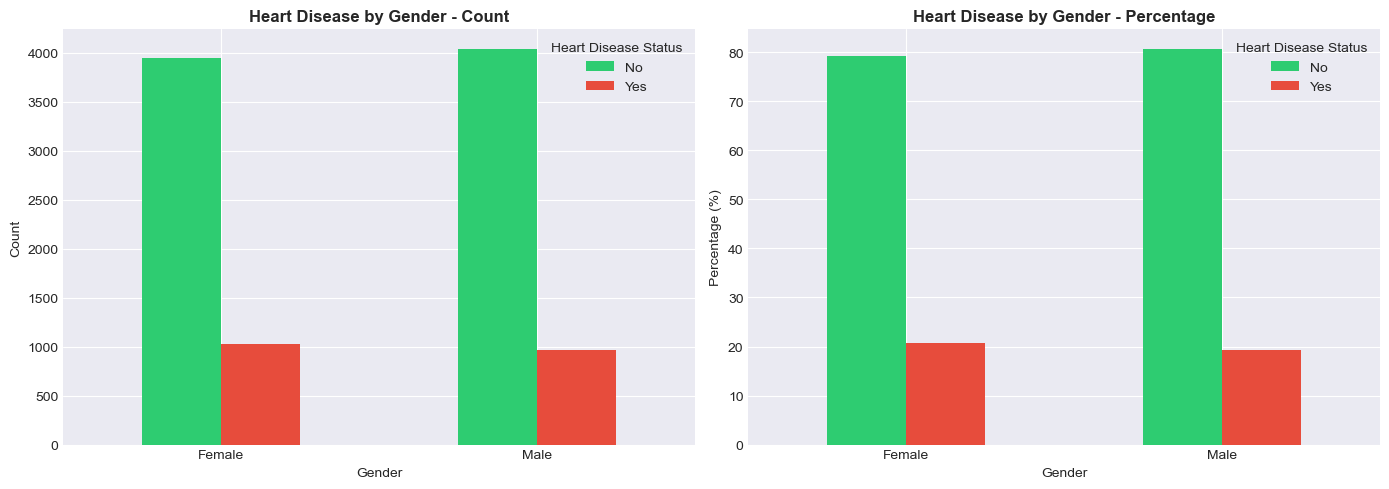

In [24]:
# Gender analysis
gender_disease = pd.crosstab(df['Gender'], df[target], normalize='index') * 100
print("Heart Disease by Gender (%):")
display(gender_disease)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count
pd.crosstab(df['Gender'], df[target]).plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Heart Disease by Gender - Count', fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title=target)
axes[0].tick_params(axis='x', rotation=0)

# Percentage
gender_disease.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Heart Disease by Gender - Percentage', fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title=target)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('eda_outputs/gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 12. Key Findings

In [25]:
print("="*80)
print("KEY FINDINGS FROM EDA")
print("="*80)

print(f"\n📊 Dataset Overview:")
print(f"   - Total Records: {len(df):,}")
print(f"   - Total Features: {len(df.columns)}")
print(f"   - Numerical Features: {len(numerical_cols)}")
print(f"   - Categorical Features: {len(categorical_cols)}")

print(f"\n📋 Data Quality:")
total_missing = df.isnull().sum().sum()
print(f"   - Total Missing Values: {total_missing:,} ({total_missing/(len(df)*len(df.columns))*100:.2f}%)")
print(f"   - Duplicate Rows: {duplicates:,}")
print(f"   - Features with >25% missing: {len(missing_data[missing_data['Missing_Percentage'] > 25])}")

print(f"\n🎯 Target Variable:")
for status, count in df[target].value_counts().items():
    print(f"   - {status}: {count:,} ({count/len(df)*100:.1f}%)")

print(f"\n🔍 Statistical Insights:")
print(f"   - Average Age: {df['Age'].mean():.1f} years")
print(f"   - Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
print(f"   - Average BMI: {df['BMI'].mean():.2f}")
print(f"   - Average Blood Pressure: {df['Blood Pressure'].mean():.1f} mmHg")
print(f"   - Average Cholesterol: {df['Cholesterol Level'].mean():.1f} mg/dL")

print(f"\n📈 Significant Predictors (p < 0.05):")
significant_features = chi_df[chi_df['Significant'] == 'Yes ✓']['Feature'].tolist()
for feat in significant_features[:5]:  # Show top 5
    print(f"   - {feat}")

print("\n" + "="*80)
print("✓ EDA COMPLETED SUCCESSFULLY!")
print("All visualizations saved to 'eda_outputs/' directory")
print("="*80)

KEY FINDINGS FROM EDA

📊 Dataset Overview:
   - Total Records: 10,000
   - Total Features: 22
   - Numerical Features: 9
   - Categorical Features: 12

📋 Data Quality:
   - Total Missing Values: 3,083 (1.40%)
   - Duplicate Rows: 0
   - Features with >25% missing: 1

🎯 Target Variable:
   - No: 8,000 (80.0%)
   - Yes: 2,000 (20.0%)

🔍 Statistical Insights:
   - Average Age: 49.3 years
   - Age Range: 18 - 80 years
   - Average BMI: 29.08
   - Average Blood Pressure: 149.8 mmHg
   - Average Cholesterol: 225.4 mg/dL

📈 Significant Predictors (p < 0.05):
   - Stress Level

✓ EDA COMPLETED SUCCESSFULLY!
All visualizations saved to 'eda_outputs/' directory
